<a href="https://colab.research.google.com/github/rahulkhawashi/IEEE-CIS-Fraud-Detection/blob/main/ieee_cis_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-end IEEE-CIS Fraud Detection
Making this project to submit in kaggle compitition.

## 1. Problem
Detect fraud from customer transactions..

If successful, we’ll improve the efficacy of fraudulent transaction alerts for millions of people around the world, helping hundreds of thousands of businesses reduce their fraud loss and increase their revenue. And of course, you will save party people just like you the hassle of false positives.

## 2. Data
The data we are using from kaggle's IEEE-CIS Fraud Detection compitition.


## 3. Evaluation
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.     
(www.kaggle.com/competitions/ieee-fraud-detection/overview/evaluation)

## 4. Features
In this project you are predicting the probability that an online transaction is fraudulent, as denoted by the binary target `isFraud`.

The data is broken into two files `identity` and `transaction`, which are joined by `TransactionID`. Not all transactions have corresponding identity information.

TransactionDT: timedelta from a given reference datetime (not an actual timestamp)

TransactionAMT: transaction payment amount in USD

ProductCD: product code, the product for each transaction

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

addr: address

dist: distance

P_ and (R__) emaildomain: purchaser and recipient email domain

C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

D1-D15: timedelta, such as days between previous transaction, etc.

M1-M9: match, such as names on card and address, etc.

Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

### Get our workspace ready

In [1]:
import os

os.listdir("drive/MyDrive/CIS Fraud Detection/")

['sample_submission.csv',
 'test_identity.csv',
 'test_transaction.csv',
 'train_identity.csv',
 'train_transaction.csv']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_trans = pd.read_csv("drive/MyDrive/CIS Fraud Detection/train_transaction.csv",
                            dtype={
        'TransactionID': 'int32',
        'isFraud': 'int8',
        'TransactionDT': 'int32'
    }
  )

train_trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train = train_trans.sort_values('TransactionDT').reset_index(drop=True)


In [5]:
#Drop extremely sparse columns
missing_ratio = train.isna().mean()
train = train[missing_ratio[missing_ratio < 0.9].index]


In [6]:
for col in train.select_dtypes(include=['float64']).columns:
    train[col] = train[col].astype('float32')


In [7]:
print(f"Memory usage: {train.memory_usage(deep=True).sum()/1024**2:.2f} MB")


Memory usage: 1202.09 MB


In [8]:
list[list(train.columns)]

list[['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83'

In [9]:
train['TransactionDT'].describe()


,TransactionDT
count,5.905400e+05
mean,7.372311e+06
std,4.617224e+06
min,8.640000e+04
25%,3.027058e+06
50%,7.306528e+06
75%,1.124662e+07
max,1.581113e+07


In [10]:
train.groupby('isFraud')['TransactionDT'].mean()


,TransactionDT
isFraud,
0,7.360791e+06
1,7.690033e+06


In [11]:
train["TransactionDT"][:5]

,TransactionDT
0,86400
1,86401
2,86469
3,86499
4,86506


In [12]:
missing_pct = train.isnull().mean() * 100
missing_pct = missing_pct.sort_values(ascending=False)

missing_pct.head(20)


,0
D13,89.509263
D14,89.469469
D12,89.041047
D6,87.606767
D9,87.312290
D8,87.312290
V148,86.123717
V149,86.123717
V141,86.123717
V146,86.123717


In [13]:
high_missing_cols = missing_pct[missing_pct > 85].index
print(f"Dropping {len(high_missing_cols)} columns")

train = train.drop(columns=high_missing_cols)


Dropping 53 columns


In [14]:
# Separate categorical & numerical features
cat_cols = train.select_dtypes(include='object').columns
num_cols = train.select_dtypes(exclude='object').columns

print("Categorical:", len(cat_cols))
print("Numerical:", len(num_cols))


Categorical: 14
Numerical: 325


In [15]:
train[cat_cols] = train[cat_cols].fillna("Unknown")


In [16]:
def reduce_mem_usage(df):
    for col in df.columns:
        if df[col].dtype != object:
            df[col] = df[col].astype('float32')
    return df

train = reduce_mem_usage(train)


In [17]:
train['TransactionAmt'].describe()


,TransactionAmt
count,590540.000000
mean,135.027161
std,239.162720
min,0.251000
25%,43.320999
50%,68.769001
75%,125.000000
max,31937.390625


In [18]:
train.groupby('isFraud')['TransactionAmt'].mean()


,TransactionAmt
isFraud,
0.0,134.511658
1.0,149.244766


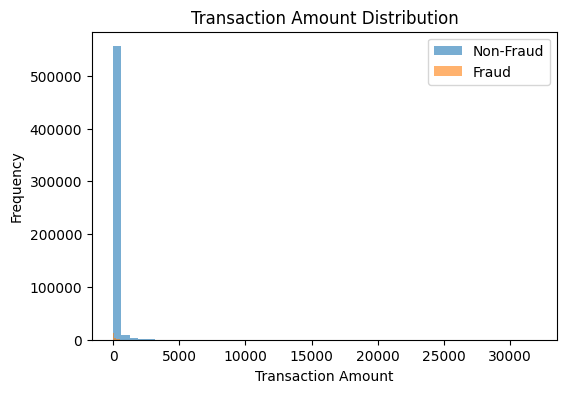

In [19]:
plt.figure(figsize=(6,4))
plt.hist(train.loc[train['isFraud']==0, 'TransactionAmt'], bins=50, alpha=0.6, label='Non-Fraud')
plt.hist(train.loc[train['isFraud']==1, 'TransactionAmt'], bins=50, alpha=0.6, label='Fraud')
plt.legend()
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-2267624282.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['time_bin'] = train['TransactionDT'] // 100000


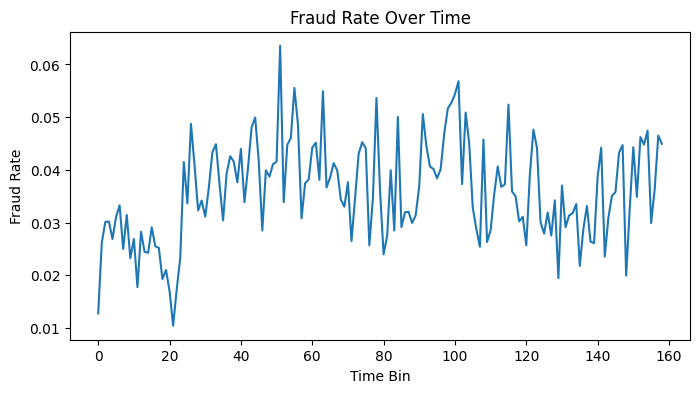

In [20]:

train['time_bin'] = train['TransactionDT'] // 100000

fraud_rate_time = train.groupby('time_bin')['isFraud'].mean()

plt.figure(figsize=(8,4))
fraud_rate_time.plot()
plt.title("Fraud Rate Over Time")
plt.xlabel("Time Bin")
plt.ylabel("Fraud Rate")
plt.show()


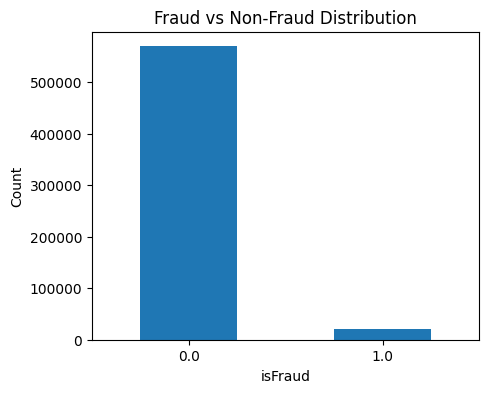

In [21]:
import matplotlib.pyplot as plt

fraud_counts = train['isFraud'].value_counts()

plt.figure(figsize=(5,4))
fraud_counts.plot(kind='bar')
plt.title("Fraud vs Non-Fraud Distribution")
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


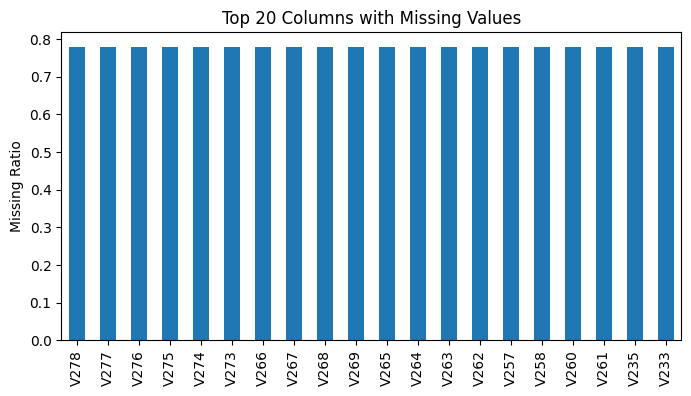

In [22]:
missing = train.isna().mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(8,4))
missing.plot(kind='bar')
plt.title("Top 20 Columns with Missing Values")
plt.ylabel("Missing Ratio")
plt.show()


In [23]:
# Remove non-predictive identifiers

train = train.drop(columns=['TransactionID'])


In [24]:
train.shape


(590540, 339)

In [25]:
'TransactionID' in train.columns


False

In [26]:
train['isFraud'].value_counts(normalize=True)


,proportion
isFraud,
0.0,0.96501
1.0,0.03499


In [27]:
train.select_dtypes(include='object').isnull().sum().sum()


np.int64(0)

In [28]:
train.describe()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,V313,V314,V315,V316,V317,V318,V319,V320,V321,time_bin
count,590540.00000,590540.00,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,...,589271.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590540.000000
mean,0.03499,7372312.50,135.027161,9898.734375,362.555511,153.194946,199.278900,290.733826,86.800652,118.502197,...,21.351477,43.319183,26.806974,109.818542,247.606750,162.153412,18.372477,42.073135,28.326582,73.223412
std,0.18398,4616766.00,239.162720,4900.358398,157.817474,11.343591,41.332321,101.700386,2.773530,371.947388,...,96.064049,173.848663,116.630798,2269.960449,3979.808105,2792.950928,331.837372,473.217529,381.328247,46.185078
min,0.00000,86400.00,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,3027057.75,43.320999,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
50%,0.00000,7306527.50,68.769001,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
75%,0.00000,11246620.00,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000
max,1.00000,15811131.00,31937.390625,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,10286.000000,...,4817.470215,7519.870117,4817.470215,93736.000000,134021.000000,98476.000000,104060.000000,104060.000000,104060.000000,158.000000


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 339 entries, isFraud to time_bin
dtypes: float32(325), object(14)
memory usage: 795.2+ MB


In [30]:
train.shape

(590540, 339)

In [31]:
# Separate Features and Target
x = train.drop(columns=['isFraud'])
y = train['isFraud']

In [32]:
# Time-Based Train and Validation Split

split_idx = int(len(train) * 0.8)

x_train = x.iloc[:split_idx]
x_val   = x.iloc[split_idx:]

y_train = y.iloc[:split_idx]
y_val   = y.iloc[split_idx:]


In [33]:
len(x_train), len(y_train), len(x_val), len(y_val)

(472432, 472432, 118108, 118108)

In [34]:
# Converting the Objects into category

cat_cols = x_train.select_dtypes(include='object').columns

for col in cat_cols:
    x_train[col] = x_train[col].astype('category')
    x_val[col]   = x_val[col].astype('category')


/tmp/ipython-input-3677186708.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = x_train[col].astype('category')
/tmp/ipython-input-3677186708.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val[col]   = x_val[col].astype('category')
/tmp/ipython-input-3677186708.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [35]:
print(y_train.value_counts())

isFraud
0.0    455833
1.0     16599
Name: count, dtype: int64


In [36]:
# Class imbalance Ratio

neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos
scale_pos_weight


27.46147358274595

In [37]:
import lightgbm as lgb

params = {
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'scale_pos_weight': scale_pos_weight,
    'verbosity': -1
}


In [38]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_val   = lgb.Dataset(x_val, y_val, reference=lgb_train)


In [39]:
import lightgbm as lgb

# Train the model
model = lgb.train(
    params,
    lgb_train,
    num_boost_round=300,
    valid_sets=[lgb_train, lgb_val],
    valid_names=['train', 'valid'],
    callbacks=[lgb.early_stopping(30, verbose=50)]
)

Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[295]	train's auc: 0.961623	valid's auc: 0.911207


In [40]:
from sklearn.metrics import roc_auc_score

val_preds = model.predict(x_val, num_iteration=model.best_iteration)
roc_auc_score(y_val, val_preds)


np.float64(0.9112070676133566)

In [42]:
'TransactionDT' in x_train.columns


True

In [44]:
# Feature Importance Analysis
import pandas as pd

importance = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model.feature_importance(importance_type='gain')
}).sort_values(by='importance', ascending=False)

importance.head(20)



,feature,importance
273,V258,821928.570950
114,V70,420997.757095
26,C13,356589.178589
12,P_emaildomain,313238.374741
309,V294,267484.211182
4,card2,200034.282700
1,TransactionAmt,186918.029968
21,C8,168033.663223
3,card1,163107.630264
13,R_emaildomain,161160.727684


In [46]:
low_imp = importance.tail(int(len(importance) * 0.25))['feature']

x_train = x_train.drop(columns=low_imp)
x_val   = x_val.drop(columns=low_imp)


##load idendity data

In [50]:
identity = pd.read_csv("drive/MyDrive/CIS Fraud Detection/train_identity.csv")
identity.shape


(144233, 41)

In [51]:
identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [52]:
id_missing = identity.isnull().mean() * 100
id_missing = id_missing.sort_values(ascending=False)
id_missing


,0
id_24,96.708798
id_25,96.441868
id_07,96.425922
id_08,96.425922
id_21,96.423149
id_26,96.420375
id_23,96.416215
id_27,96.416215
id_22,96.416215
id_18,68.722137


In [53]:
id_drop_cols = id_missing[id_missing > 70].index
identity = identity.drop(columns=id_drop_cols)

identity.shape


(144233, 32)

## reimport the dataset


In [1]:
import pandas as pd

train_trx = pd.read_csv("drive/MyDrive/CIS Fraud Detection/train_transaction.csv")
train_id  = pd.read_csv("drive/MyDrive/CIS Fraud Detection/train_identity.csv")

print(train_trx.shape)
print(train_id.shape)



(590540, 394)
(144233, 41)


In [2]:
train = train_trx.merge(train_id, how="left", on="TransactionID")

print("After merge shape:", train.shape)


After merge shape: (590540, 434)


In [3]:
# Sort by Time
train = train.sort_values("TransactionDT")


In [4]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [5]:
import pandas as pd
import numpy as np

missing = train.isnull().mean().sort_values(ascending=False)

missing.head(20)


,0
id_24,0.991962
id_25,0.991310
id_07,0.991271
id_08,0.991271
id_21,0.991264
id_26,0.991257
id_27,0.991247
id_23,0.991247
id_22,0.991247
dist2,0.936284


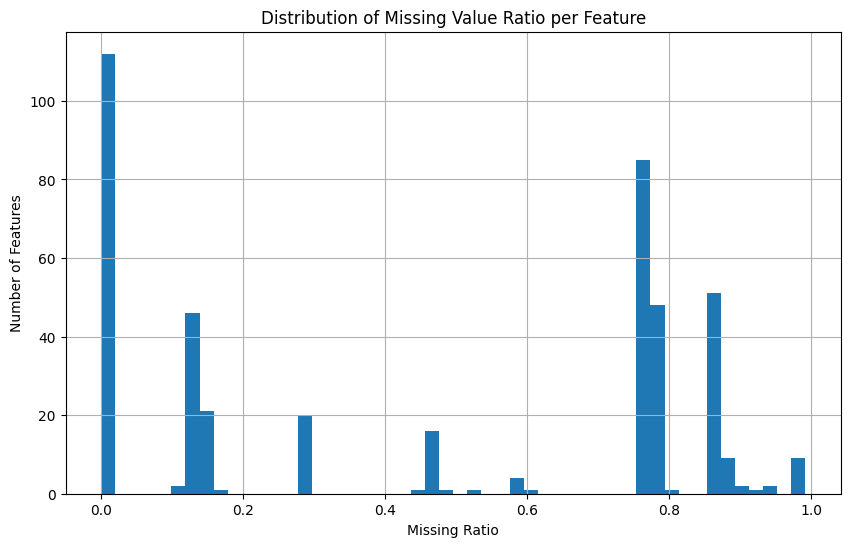

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
missing.hist(bins=50)
plt.title("Distribution of Missing Value Ratio per Feature")
plt.xlabel("Missing Ratio")
plt.ylabel("Number of Features")
plt.show()


In [9]:
missing_threshold = 0.85

cols_to_drop = missing[missing > missing_threshold].index

print("Dropping columns:", len(cols_to_drop))

train = train.drop(columns=cols_to_drop)


Dropping columns: 74


KeyError: "['id_24', 'id_25', 'id_07', 'id_08', 'id_21', 'id_26', 'id_27', 'id_23', 'id_22', 'dist2', 'D7', 'id_18', 'D13', 'D14', 'D12', 'id_04', 'id_03', 'D6', 'id_33', 'id_09', 'D8', 'id_10', 'D9', 'id_30', 'id_32', 'id_34', 'id_14', 'V138', 'V139', 'V148', 'V154', 'V162', 'V141', 'V157', 'V146', 'V163', 'V155', 'V142', 'V161', 'V158', 'V156', 'V140', 'V149', 'V147', 'V153', 'V159', 'V160', 'V166', 'V164', 'V165', 'V152', 'V145', 'V143', 'V144', 'V150', 'V151', 'V330', 'V329', 'V336', 'V333', 'V334', 'V331', 'V326', 'V325', 'V324', 'V327', 'V323', 'V322', 'V338', 'V339', 'V335', 'V337', 'V328', 'V332'] not found in axis"

In [19]:
print("TransactionDT exists:", "TransactionDT" in train.columns)
print("isFraud exists:", "isFraud" in train.columns)
print("Shape:", train.shape)


TransactionDT exists: True
isFraud exists: True
Shape: (590540, 360)


In [10]:
missing_indicator = train['DeviceInfo'].isnull().astype(int)

pd.crosstab(missing_indicator, train['isFraud'], normalize='index')


isFraud,0,1
DeviceInfo,,
0,0.927469,0.072531
1,0.974451,0.025549


In [11]:
num_cols = train.select_dtypes(include=[np.number]).columns
cat_cols = train.select_dtypes(include=['object']).columns


In [12]:
for col in num_cols:
    train[col] = train[col].fillna(train[col].median())


In [13]:
for col in cat_cols:
    train[col] = train[col].fillna("Missing")


In [20]:
missing = train.isnull().mean().sort_values(ascending=False)

print(missing.head(10))



DeviceInfo        0.0
TransactionID     0.0
isFraud           0.0
TransactionDT     0.0
TransactionAmt    0.0
ProductCD         0.0
card1             0.0
card2             0.0
id_11             0.0
id_06             0.0
dtype: float64


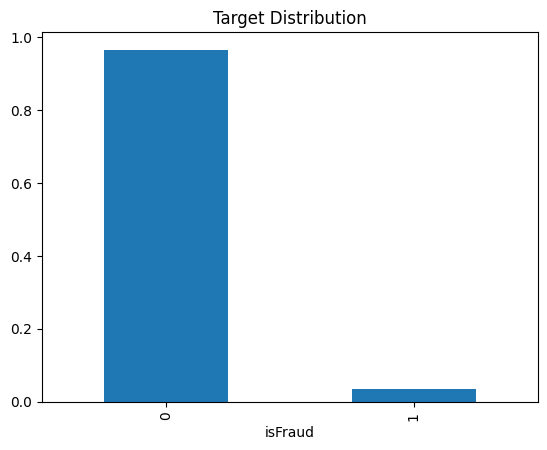

In [14]:
# Target Imbalance
train['isFraud'].value_counts(normalize=True).plot(kind='bar')
plt.title("Target Distribution")
plt.show()


## data looks highly imbalanced

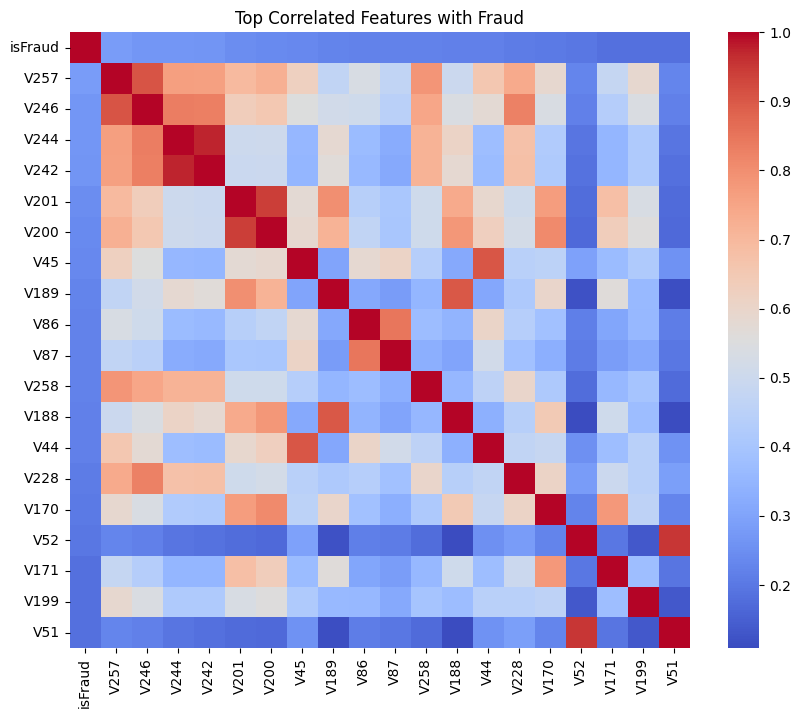

In [15]:
import seaborn as sns

top_corr = train[num_cols].corr()['isFraud'].abs().sort_values(ascending=False).head(20).index

plt.figure(figsize=(10,8))
sns.heatmap(train[top_corr].corr(), cmap="coolwarm")
plt.title("Top Correlated Features with Fraud")
plt.show()


In [18]:
train.shape

(590540, 360)

In [21]:
fraud_ratio = train['isFraud'].mean()
scale_pos_weight = (1 - fraud_ratio) / fraud_ratio

print(scale_pos_weight)


27.579586700866283


In [22]:
split_index = int(len(train) * 0.8)

train_data = train.iloc[:split_index]
val_data   = train.iloc[split_index:]

X_train = train_data.drop("isFraud", axis=1)
y_train = train_data["isFraud"]

X_val = val_data.drop("isFraud", axis=1)
y_val = val_data["isFraud"]


In [23]:
X_train = X_train.drop(columns=["TransactionID"])
X_val   = X_val.drop(columns=["TransactionID"])


In [24]:
cat_cols = X_train.select_dtypes(include=['object']).columns


In [25]:
for col in cat_cols:
    X_train[col] = X_train[col].astype('category')
    X_val[col]   = X_val[col].astype('category')


In [27]:
import lightgbm as lgb

model = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=64,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric="auc",
    categorical_feature=list(cat_cols),
    callbacks=[lgb.early_stopping(50)]
)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 16599, number of negative: 455833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.478999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27901
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 355
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035135 -> initscore=-3.312784
[LightGBM] [Info] Start training from score -3.312784
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[483]	training's auc: 0.988231	training's binary_logloss: 0.0379398	valid_1's auc: 0.919993	valid_

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, n_estimators=500,
               num_leaves=64, random_state=42, subsample=0.8)

In [29]:
from sklearn.metrics import roc_auc_score

# Train predictions
y_train_pred = model.predict_proba(X_train)[:, 1]

# Train AUC
train_auc = roc_auc_score(y_train, y_train_pred)

print("Train AUC:", train_auc)


Train AUC: 0.9882305217892546


In [28]:
from sklearn.metrics import roc_auc_score

y_pred = model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)

print("Validation AUC with Identity:", auc)


Validation AUC with Identity: 0.9199934069341106


In [34]:
"""by compairing train auc and
 Valid auc it seems like our model is overfitting """

#  Smaller gap = healthier model

'by compairing train auc and\n Valid auc it seems like our model is overfitting '

## regularization

In [33]:
model = lgb.LGBMClassifier(
    n_estimators=1200,
    learning_rate=0.03,
    num_leaves=31,
    max_depth=8,
    min_child_samples=100,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_alpha=1.0,              # L1 regularization
    reg_lambda=1.0,             # L2 regularization
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric="auc",
    categorical_feature=list(cat_cols),
    callbacks=[lgb.early_stopping(100)]
)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 16599, number of negative: 455833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.477633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27894
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 353
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035135 -> initscore=-3.312784
[LightGBM] [Info] Start training from score -3.312784
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2]	training's auc: 0.872001	training's binary_logloss: 0.140596	valid_1's auc: 0.850183	valid_1's binary_logl

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.03, max_depth=8,
               min_child_samples=100, n_estimators=1200, random_state=42,
               reg_alpha=1.0, reg_lambda=1.0,
               scale_pos_weight=np.float64(27.579586700866283), subsample=0.8)

Smaller trees

Less memorization

Better generalization

Train AUC will drop

Validation AUC may increase slightly